# MINI PROJECT 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

## 1).Problem Statement


## 2).Hypothesis Generation

here are some hypotheses that could be generated based on the problem statement:

1-Store location: Sales may be influenced by the location of the store, such as proximity to residential areas, commercial areas, or transportation hubs. Hypothesis: Stores located in densely populated areas or near transportation hubs may have higher sales than stores in less populated or isolated areas.

2-Product characteristics: Sales may be influenced by the characteristics of the product, such as price, brand, packaging, or quality. Hypothesis: Products with lower prices or those from well-known brands may have higher sales than products with higher prices or from lesser-known brands.

3-Store size and layout: Sales may be influenced by the size and layout of the store, such as the number and arrangement of aisles, shelves, and displays. Hypothesis: Stores with larger sales floors and more prominent displays may have higher sales than stores with smaller sales floors or less visible displays.

4-Seasonal factors: Sales may be influenced by seasonal factors, such as holidays or weather conditions. Hypothesis: Sales of certain products may increase during certain seasons or holidays, such as sales of cold drinks during summer or sales of gift items during Christmas.

5-Store promotions: Sales may be influenced by store promotions, such as discounts, coupons, or special offers. Hypothesis: Products that are part of store promotions may have higher sales than products that are not part of promotions.

These hypotheses can be tested using statistical techniques and machine learning algorithms to determine which factors have the greatest impact on sales and to develop a predictive model that accurately estimates the sales of each product at a particular store.

## 3).Loading Packages and Data


In [10]:
import pandas as pd
data = pd.read_csv("Train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data Structure and Content

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


there are total 12 columns but there are 6 numeric columns  

## 5).Exploratory Data Analysis - Outliers

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Define function to detect outliers using Tukey's method
def tukey_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers

#Tukeys method just assumes that if an element is not in the IQR, then it is an outlier.

# Apply Tukey's method to each numerical column
outlier_counts = {}
for col in data.select_dtypes(include=[np.number]).columns:
    outliers = tukey_outlier(data, col)
    outlier_count = len(outliers)
    outlier_counts[col] = outlier_count
    
# Print the number of outliers detected for each column
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Item_Weight: 0 outliers
Item_Visibility: 144 outliers
Item_MRP: 0 outliers
Outlet_Establishment_Year: 0 outliers
Item_Outlet_Sales: 186 outliers


## 6).Univariate Analysis

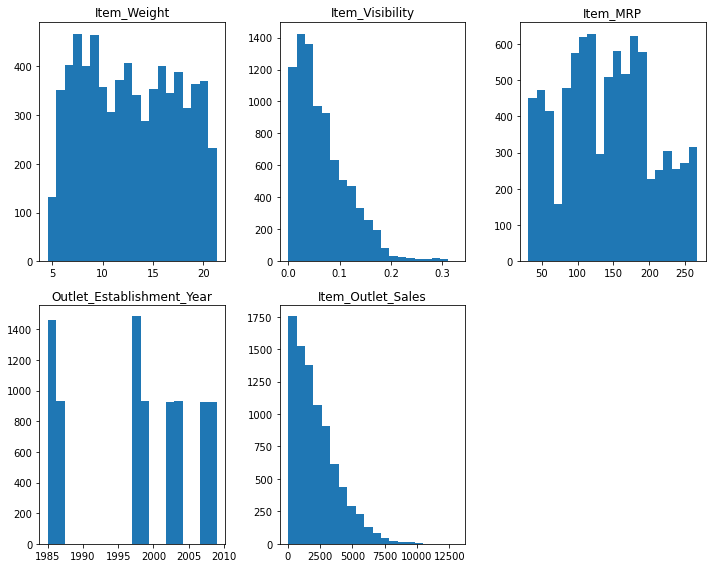

In [46]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.hist(data['Item_Weight'], bins=20)
plt.title('Item_Weight')
plt.subplot(2, 3, 2)
plt.hist(data['Item_Visibility'], bins=20)
plt.title('Item_Visibility')
plt.subplot(2, 3, 3)
plt.hist(data['Item_MRP'], bins=20)
plt.title('Item_MRP')
plt.subplot(2, 3, 4)
plt.hist(data['Outlet_Establishment_Year'], bins=20)
plt.title('Outlet_Establishment_Year')
plt.subplot(2, 3, 5)
plt.hist(data['Item_Outlet_Sales'], bins=20)
plt.title('Item_Outlet_Sales')
plt.tight_layout()
plt.show()

<AxesSubplot: >

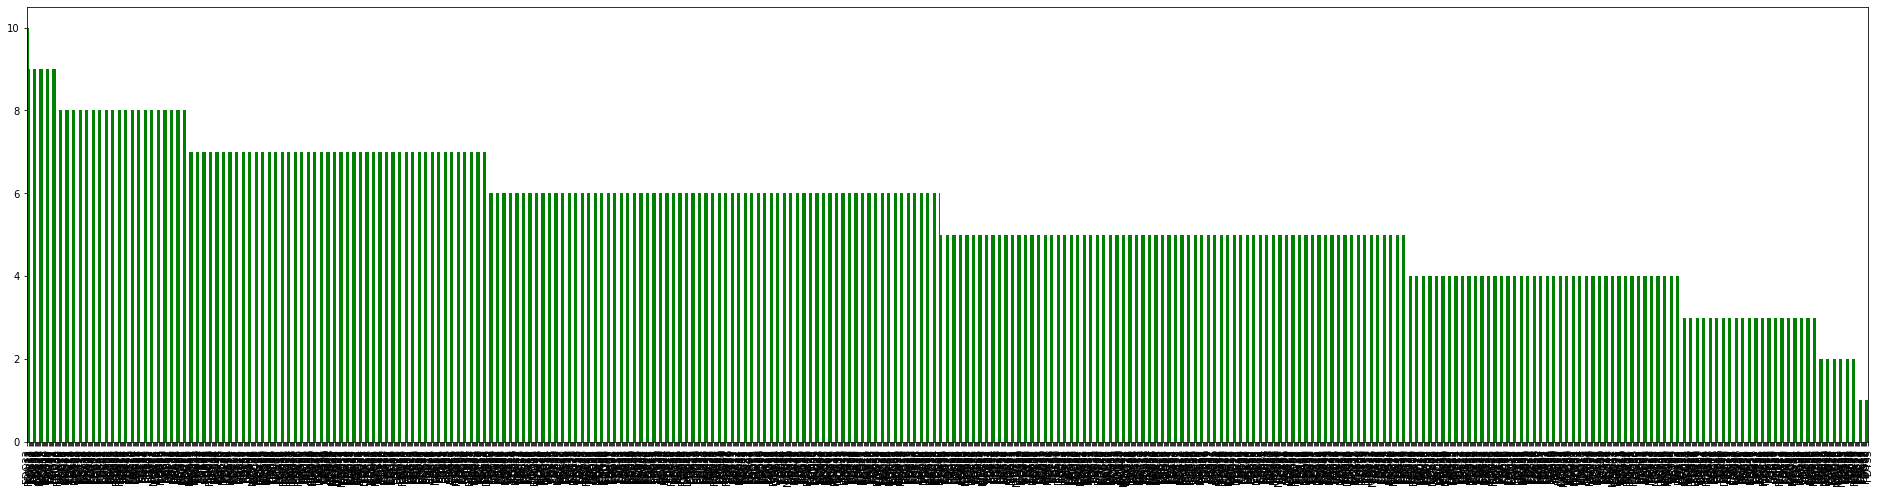

In [47]:
data['Item_Identifier'].value_counts().plot(kind = 'bar', color= "g",figsize=(33, 8))

Text(0.5, 1.0, 'Outlet_Type')

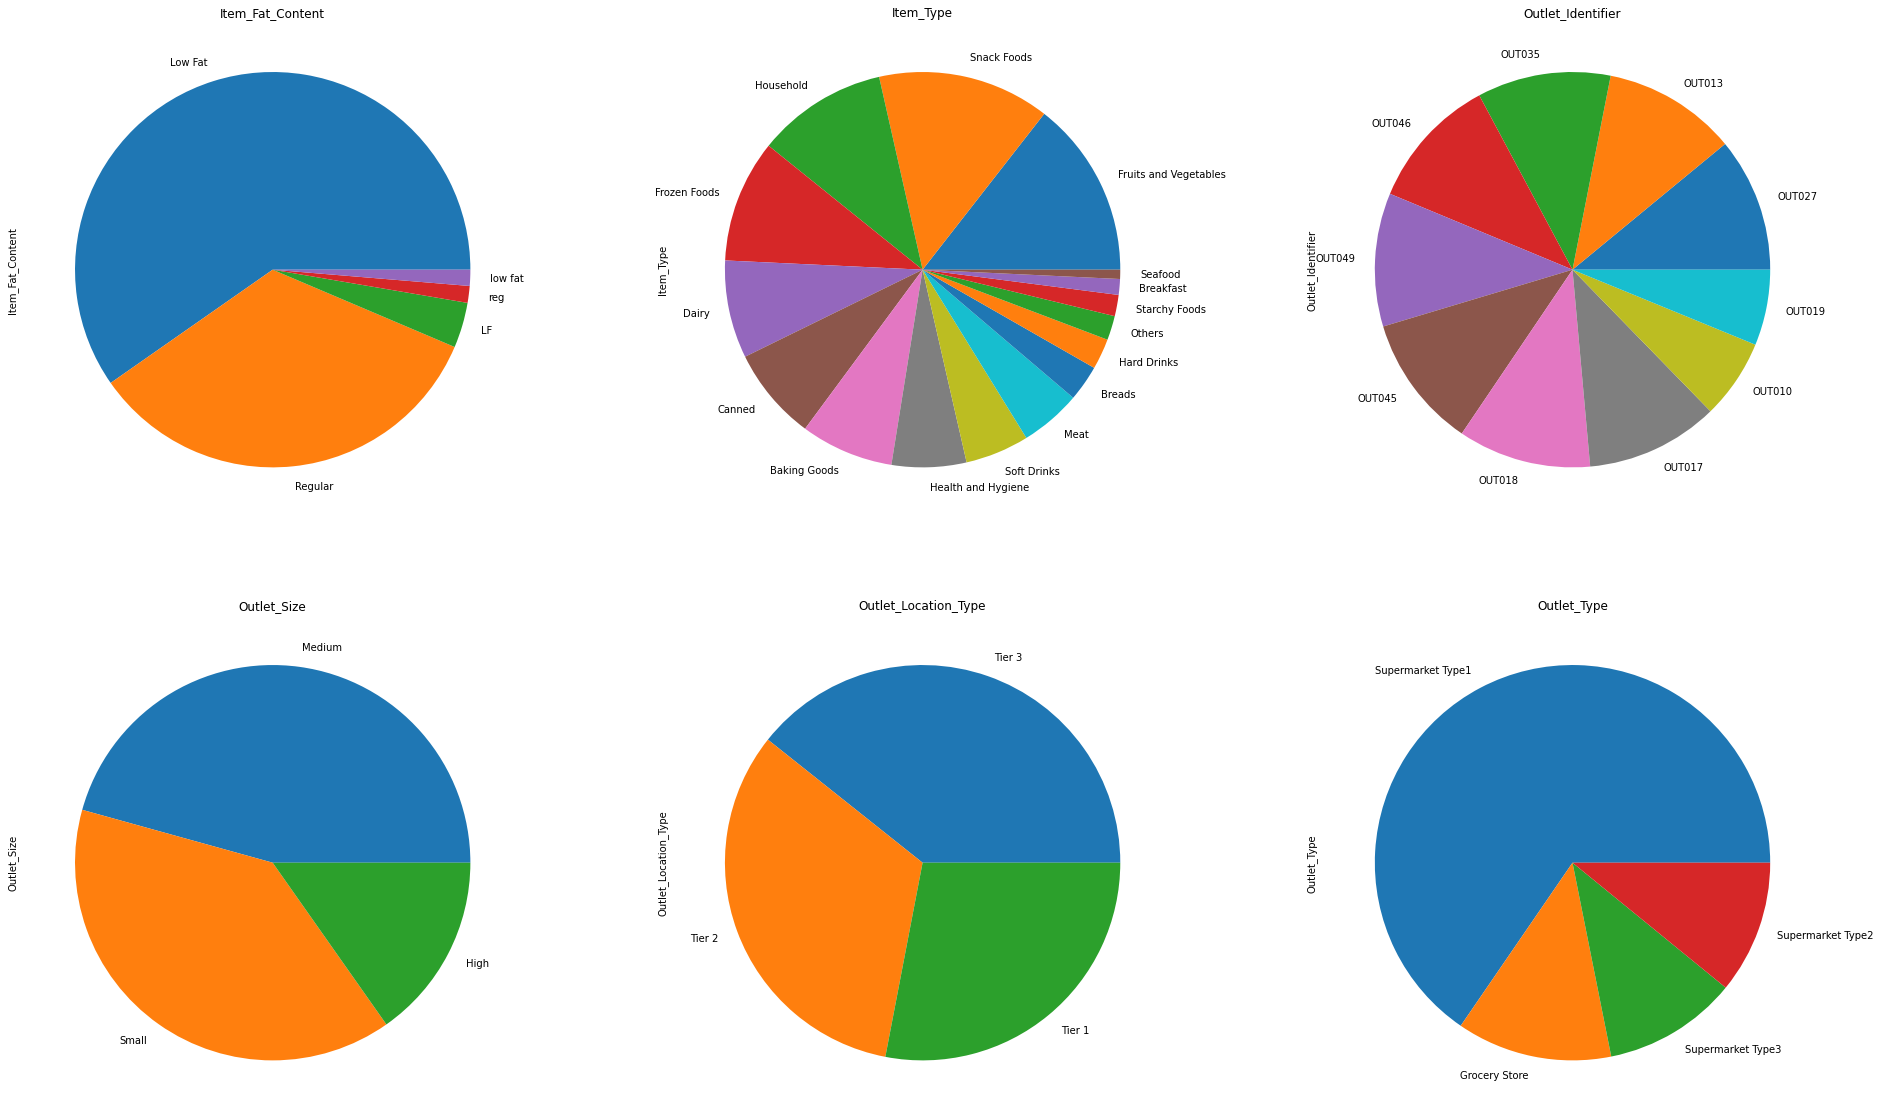

In [48]:
plt.figure(figsize=(33, 20))
plt.subplot(2, 3, 1)
data['Item_Fat_Content'].value_counts().plot(kind= 'pie')
data['Item_Fat_Content'].value_counts();
plt.title('Item_Fat_Content')
plt.subplot(2, 3, 2)
data['Item_Type'].value_counts().plot(kind= 'pie')
data['Item_Type'].value_counts();
plt.title('Item_Type')
plt.subplot(2, 3, 3)
data['Outlet_Identifier'].value_counts().plot(kind= 'pie')
data['Outlet_Identifier'].value_counts();
plt.title('Outlet_Identifier')
plt.subplot(2, 3, 4)
data['Outlet_Size'].value_counts().plot(kind= 'pie')
data['Outlet_Size'].value_counts();
plt.title('Outlet_Size')
plt.subplot(2, 3, 5)
data['Outlet_Location_Type'].value_counts().plot(kind= 'pie')
data['Outlet_Location_Type'].value_counts();
plt.title('Outlet_Location_Type')
plt.subplot(2, 3, 6)
data['Outlet_Type'].value_counts().plot(kind= 'pie')
data['Outlet_Type'].value_counts();
plt.title('Outlet_Type')

## 7).Bivariate Analysis

<AxesSubplot: >

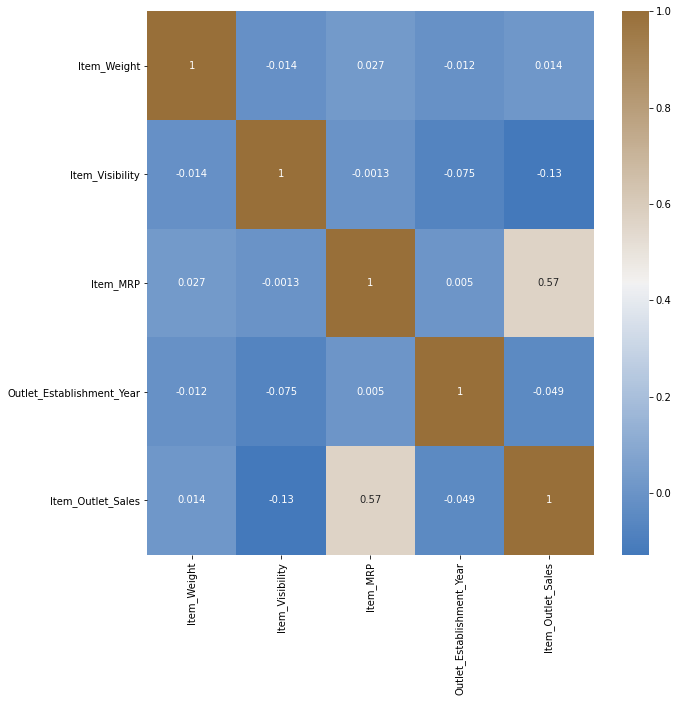

In [51]:
# finding Correlation between different variables of dataset using heat map
correlation = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
# up_tri = np.triu(np.ones_like(corr, dtype=bool))
mapp = sns.diverging_palette(250, 50, as_cmap=True)
sns.heatmap(correlation, annot=True, mask = None, cmap=mapp)

Note: there is no strong corelation between the variables. The highest correlation seen here is 0.42 between Item_Outlet_Sales and Item_MRP which is 42% not a strong correlation

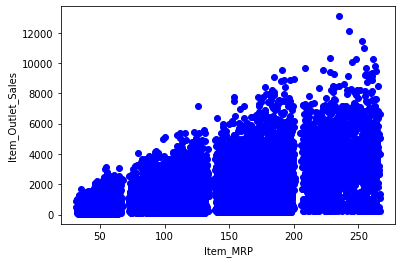

In [53]:
# Since Item_Outlet_Sales and Item_MRP had the highest correlation observed, 
# let’s create a scatterplot for these two variables
x=data['Item_MRP']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "blue")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

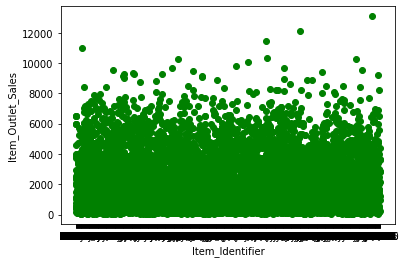

In [58]:
# let’s create a scatterplot for these two variables
x=data['Item_Identifier']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "green")
plt.xlabel("Item_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

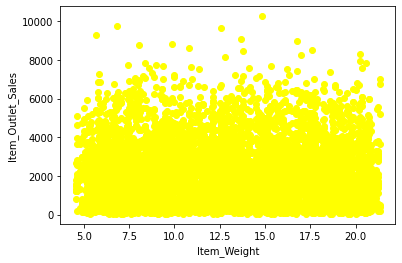

In [59]:
# let’s create a scatterplot for these two variables
x=data['Item_Weight']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "yellow")
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.show()

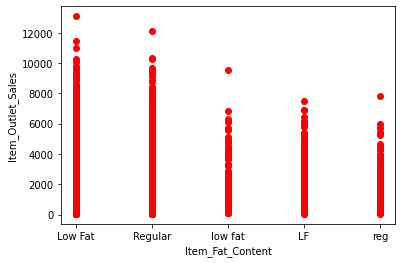

In [60]:
# let’s create a scatterplot for these two variables
x=data['Item_Fat_Content']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "red")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show()

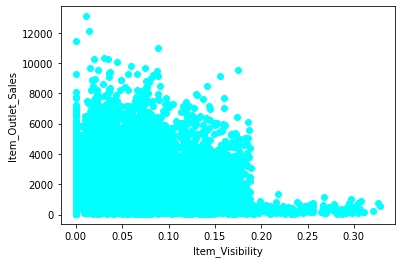

In [61]:
# let’s create a scatterplot for these two variables
x=data['Item_Visibility']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "cyan")
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.show()

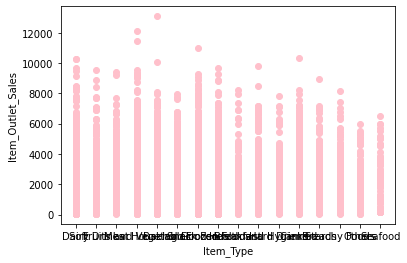

In [62]:
# let’s create a scatterplot for these two variables
x=data['Item_Type']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "pink")
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

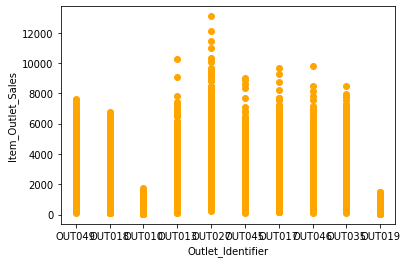

In [63]:
# let’s create a scatterplot for these two variables
x=data['Outlet_Identifier']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "orange")
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

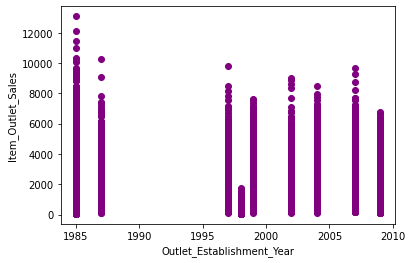

In [64]:
# let’s create a scatterplot for these two variables
x=data['Outlet_Establishment_Year']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "purple")
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.show()

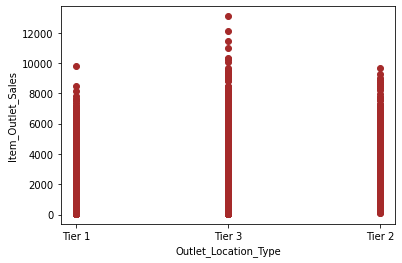

In [67]:
# let’s create a scatterplot for these two variables
x=data['Outlet_Location_Type']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "brown")
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

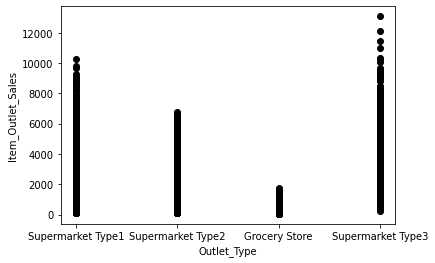

In [68]:
# let’s create a scatterplot for these two variables
x=data['Outlet_Type']
y=data['Item_Outlet_Sales']
plt.scatter(x, y,color = "black")
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

## 8).Missing Value Treatment

<AxesSubplot: >

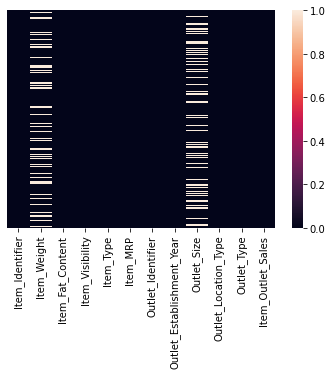

In [71]:
# Heat map in order to locate which cols have null values in the results we see that only age has null values in it
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=None)

In [77]:
# replacing missing values in quantity
# column with mean of that column
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
  
# replacing missing values in price column
# with median of that column
data.fillna(data['Outlet_Size'].mode()[0], inplace=True)

<AxesSubplot: >

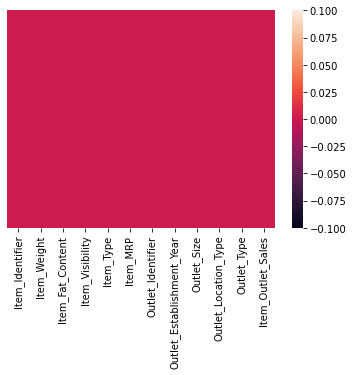

In [78]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=None)

## 9).Feature Engineering

I have already done Numerical Imputation and Categorical Imputation as above

## 10).Encoding Categorical Variables

## 11).Label Encoding

In [81]:
#these are for sequential features labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(data.Item_Fat_Content.drop_duplicates())
data.Item_Fat_Content=le.transform(data.Item_Fat_Content)
print(data["Item_Fat_Content"])


le.fit(data.Outlet_Size.drop_duplicates())
data.Outlet_Size=le.transform(data.Outlet_Size)
print(data["Outlet_Size"])

le.fit(data.Outlet_Location_Type.drop_duplicates())
data.Outlet_Location_Type=le.transform(data.Outlet_Location_Type)
print(data["Outlet_Location_Type"])


0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int64
0       1
1       1
2       1
3       1
4       0
       ..
8518    0
8519    1
8520    2
8521    1
8522    2
Name: Outlet_Size, Length: 8523, dtype: int64
0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64


## 12).One Hot Encoding

In [90]:
#these are for non-sequential features labels
# create a list of all categorical columns
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

# perform one-hot encoding on all categorical columns
df_encoded = pd.get_dummies(data, columns=cat_cols)

## 13).PreProcessing Data

In [91]:
from sklearn import preprocessing

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns=data.columns)
print(scaled_df)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0            0.001878     0.007443          0.007157         0.002072   
1            0.000096     0.004738          0.014313         0.002490   
2            0.007969     0.014006          0.007157         0.002164   
3            0.013494     0.015366          0.014313         0.000000   
4            0.015613     0.007147          0.007157         0.000000   
...               ...          ...               ...              ...   
8518         0.004454     0.005494          0.007157         0.007333   
8519         0.010798     0.006707          0.014313         0.006067   
8520         0.016335     0.008483          0.007157         0.004544   
8521         0.008197     0.005770          0.014313         0.018754   
8522         0.000602     0.011845          0.007157         0.005796   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0      0.005181  0.017556           0.017696    

## 14).Modeling

In [94]:
#spliting the dataset in 80:20
reg=data
x=reg.drop(['Item_Outlet_Sales'], axis=1)
y=reg.Item_Outlet_Sales
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Linear Regression

In [99]:
lr = LinearRegression(normalize=True).fit(x_train, y_train)
train_predict_lr=lr.predict(x_train)
test_predict_lr=lr.predict(x_test)

from sklearn.metrics import r2_score

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("R squared for Training set: ", r2_score(y_train,train_predict_lr))
print("R squared for Test set: ", r2_score(y_test,test_predict_lr))

(6818, 11) (1705, 11) (6818,) (1705,)
R squared for Training set:  0.5095637584210898
R squared for Test set:  0.5127044026662455


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Regularized Linear Regression

In [111]:
 # Fit a regularized linear regression model
from sklearn.linear_model import LinearRegression, Lasso
lasso = Lasso(alpha=0.1)
train_predict_lt=lasso.fit(x_train, y_train)
test_predict_ltest=lasso.fit(x_test, y_test)

print("R squared for Training set: ", lasso.score(x_train, y_train))
print("R squared for Test set: ", lasso.score(x_test, y_test))


R squared for Training set:  0.5076502576934788
R squared for Test set:  0.5146136869896121


## Random Forest 

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
train_predict_rf=rf.predict(x_train)
test_predict_rf=rf.predict(x_test)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("R squared for Training set: ", r2_score(y_train,train_predict_rf))
print("R squared for Test set: ", r2_score(y_test,test_predict_rf))
# evaluate_regression(clean_evals,rf, "RandomForest Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

(6818, 11) (1705, 11) (6818,) (1705,)
R squared for Training set:  0.9414219857190004
R squared for Test set:  0.5440425613724653


### XGBoost

In [114]:
#Fit an xgb Regressor model
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_model.fit(x_test, y_test)

print("R squared for Training set: ", xgb_model.score(x_train, y_train))
print("R squared for Test set: ", xgb_model.score(x_test, y_test))

R squared for Training set:  0.4780291900034985
R squared for Test set:  0.9785793050013178
